# Predicción Lineal

## Maximiliano Zitelli y Santiago Ivulich

## 1. 
Realizar una grabación de duración T = 2 s y fs = 8 kHz de los sonidos /a/ y /sh/.


In [0]:
!pip install pydub

In [0]:
import numpy as np
from scipy import linalg,signal
import matplotlib.pyplot as plt
from scipy.io import wavfile

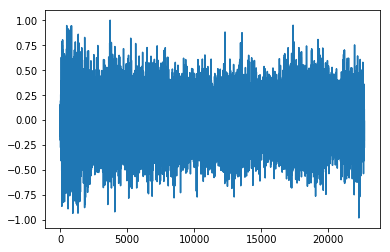

In [0]:
from pydub import AudioSegment
from IPython.display import Audio

sound = 'a'

fileNameSH = 'shSound'
fileNameA = 'aSound'
if sound == 'a':
    audio = AudioSegment.from_file(fileNameA+'.m4a')
else:
    audio = AudioSegment.from_file(fileNameSH+'.m4a')
audio = audio.set_frame_rate(8000)
audioL = audio.split_to_mono()[0]
audioR = audio.split_to_mono()[1]
samplesL = np.array(audioL.get_array_of_samples())
samplesR = np.array(audioR.get_array_of_samples())
samples = (samplesL + samplesR)/2
samples = samples/max(samples)

fs = audioL.frame_rate
plt.plot(samples)
plt.show()

Audio(data=samples,rate=fs)

## 2.
Para ambos sonidos, realizar la predicción forward con N0 = 1, y representar el error
cuadrático medio J en función de M, para valores de M entre 1 y 100.


In [0]:
Ms = np.linspace(1,100,100,dtype=int)

In [0]:
def calc_optimum_filter(sigma2, R, p):
    '''
    Calcula el filtro Wiener óptimo
    sigma2: energía de la señal de entrada
    R: matriz de autocorrelación
    p: vector de correlación cruzada
    '''
    wo = np.dot(linalg.inv(R), p)
    Jmin = sigma2 - p.dot(wo)
    return (wo, Jmin)

def getFilter(fs,r,p,M=0):
    '''
    Calcula el filtro de prección. Si no se especifica M se calcula para todos
    los ordenes. De lo contrario, se calcula el filtro para el orden M.
    '''
    if M == 0:
        Jmin = np.zeros(len(Ms))
        for i,M in enumerate(Ms):
            print("Calculando filtro de orden",M)
            R = linalg.toeplitz(r[0:M])
            wo, Jmin[i] = calc_optimum_filter(sigma2d, R, p[0:M])
    else:
        print("Calculando filtro de orden",M)
        R = linalg.toeplitz(r[0:M])
        wo, Jmin = calc_optimum_filter(sigma2d, R, p[0:M])
    return wo,Jmin

# function to keep the data within integer limits, and write to wavfile:
def write_wavfile(filename,fs,data):
    d = np.int16(data/np.max(np.abs(data)) * 32767 * 0.9)
    wavfile.write(filename,int(fs), d)

In [0]:
u = samples
u_f = np.fft.fft(u)

##Estimo la autocorrelación
r = np.fft.ifft(u_f * u_f.conj()).real
r = r[:len(u)//2]/len(u)
sigma2d = r[0]

In [0]:
wo,Jmin = getFilter(fs,r,r[1:])

Calculando filtro de orden 1
Calculando filtro de orden 2
Calculando filtro de orden 3
Calculando filtro de orden 4
Calculando filtro de orden 5
Calculando filtro de orden 6
Calculando filtro de orden 7
Calculando filtro de orden 8
Calculando filtro de orden 9
Calculando filtro de orden 10
Calculando filtro de orden 11
Calculando filtro de orden 12
Calculando filtro de orden 13
Calculando filtro de orden 14
Calculando filtro de orden 15
Calculando filtro de orden 16
Calculando filtro de orden 17
Calculando filtro de orden 18
Calculando filtro de orden 19
Calculando filtro de orden 20
Calculando filtro de orden 21
Calculando filtro de orden 22
Calculando filtro de orden 23
Calculando filtro de orden 24
Calculando filtro de orden 25
Calculando filtro de orden 26
Calculando filtro de orden 27
Calculando filtro de orden 28
Calculando filtro de orden 29
Calculando filtro de orden 30
Calculando filtro de orden 31
Calculando filtro de orden 32
Calculando filtro de orden 33
Calculando filtro d

### J<sub>min</sub> en función de M

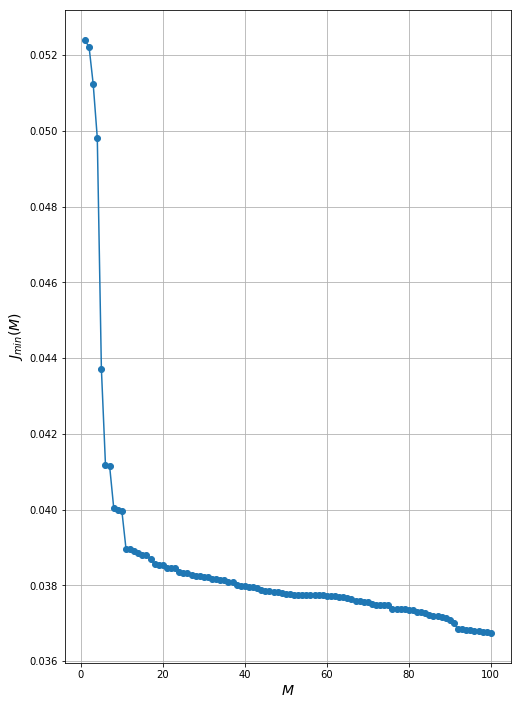

In [0]:
plt.figure(figsize=(8, 12))
plt.plot( Ms,Jmin, marker='o')
plt.xlabel('$M$', fontsize=14)
plt.ylabel('$J_{min}(M)$', fontsize=14)
plt.grid()
plt.show()

## 3.
### i.
Para ambos sonidos, analizar cualitativa- y cuantitativamente la señal del error de predicción y el espectro H(ejω) de filtro autorregresivo estimado para M = 1, 6, 12, 24, 100. 

Calculando filtro de orden 2


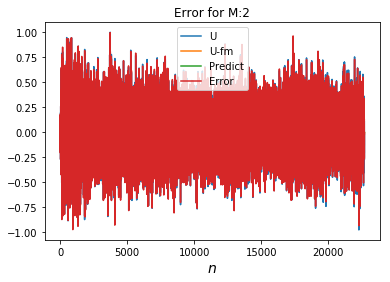

Calculando filtro de orden 6


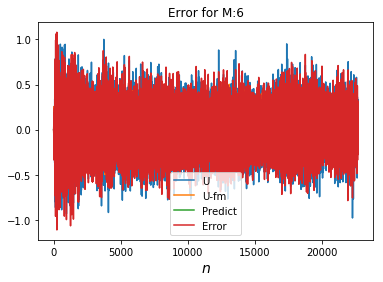

Calculando filtro de orden 12


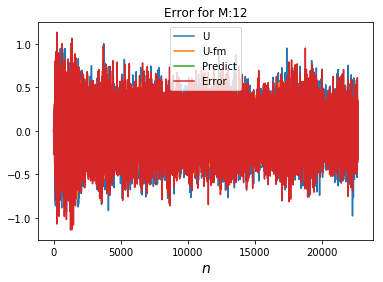

Calculando filtro de orden 24


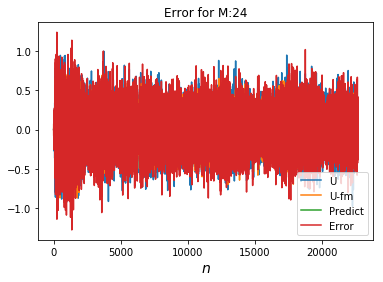

Calculando filtro de orden 100


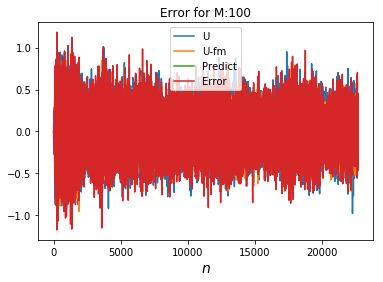

In [0]:
M2Check = [2,6,12,24,100]
##Filtro de error de predicción
for M in M2Check:
    wo,Jmin_ = getFilter(fs,r,r[1:],M)
    a = np.ones((len(wo)+1))
    a[1:] = -wo

    fm = signal.filtfilt(a,[1],u)
    predict = signal.filtfilt(wo,[1],u[1:])
    plt.figure()
    plt.plot(u,label='U')
    plt.plot(u-fm,label='U-fm')
    plt.plot(predict,label='Predict')
    plt.plot(fm,label='Error')
    plt.legend()
    plt.title("Error for M:{}".format(M))
    #plt.ylim(-1,1)
    plt.xlabel('$n$', fontsize=14)
    plt.show()

Se puede observar en los gráficos como aumentando el orden del filtro, la señal de error se vuelve cada vez menor, por lo que la predicción es cada vez mejor. Se comparan además la señal a la salida el filtro de predicción con la diferencia entre la entrada y la salida del filtro de error de predicción.

### ii.
Comparar este espectro con el espectro obtenido por estimación no-paramétrica.


Calculando filtro de orden 2


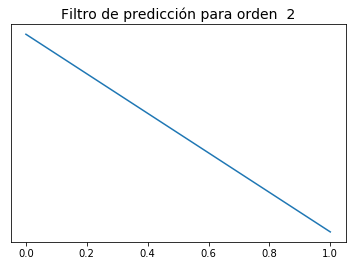

Calculando filtro de orden 6


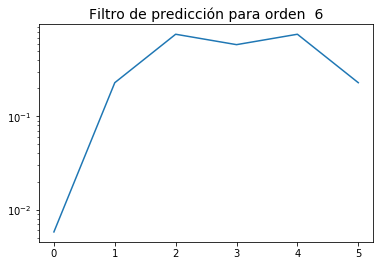

Calculando filtro de orden 12


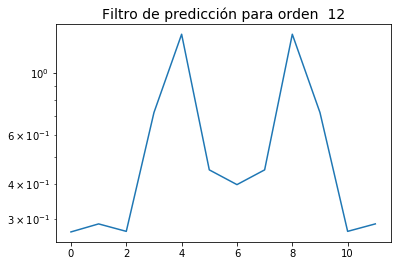

Calculando filtro de orden 24


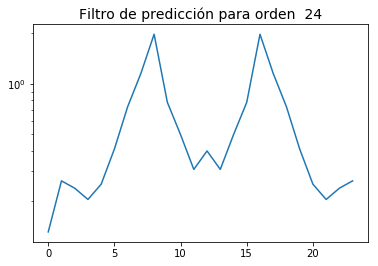

Calculando filtro de orden 100


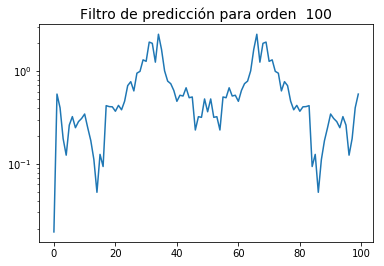

In [0]:
##Se grafican para los ordenes requeridos, la transferencia del filtro de predicción.
for M in M2Check:
    wo,Jmin_ = getFilter(fs,r,r[1:],M)
    H_f = np.fft.fft(wo)
    plt.semilogy(np.abs(H_f))
    plt.title('Filtro de predicción para orden  ' + str(M), fontsize=14)
    plt.show()

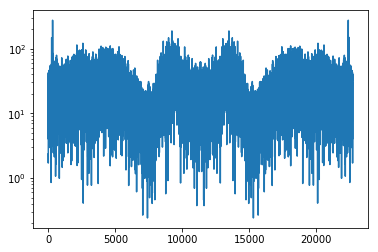

In [0]:
##Estimación no-paramétrica
U_f = np.fft.fft(samples)
plt.semilogy(np.abs(U_f))
plt.show()

## 4 - 5
¿Cuál es el orden óptimo Mo para cada sonido?
Sintetizar los sonidos aplicando el filtro autorregresivo estimado de orden Mo a una excitación apropiada.


El orden óptimo en cada caso se obtiene a partir del gráfico de $J_{min}$ en función de $m$. El orden óptimo es aquel para el cual no se observa una mejora apreciable del error.
Para el caso del sonido /a/, se toma un orden óptimo de $M=74$, y para /sh/ $M=50$.

Calculando filtro de orden 50


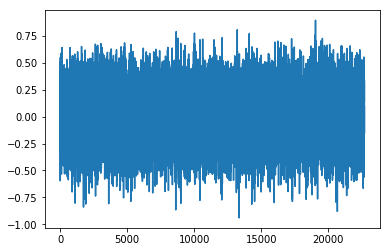

In [0]:
if sound == 'a':
    M0 = 74
else:
    M0 = 50

##Calculo el filtro del error de predicción para el orden optimo
wo,Jmin = getFilter(fs,r,r[1:],M0)
a_k = np.ones((len(wo)+1))
a_k[1:] = -wo

##Sintetizo el sonido a partir de ruido blanco con varianza dada por Jmin
sint = np.zeros((len(samples)+len(a_k),))
noise = np.random.normal(0, np.sqrt(Jmin), len(sint))

for i in range(len(a_k),len(sint)):
    sint[i] = sum([-a_k[kdx]*sint[i-kdx] for kdx in range(len(a_k))]) + noise[i]
sint = sint[len(a_k):]

plt.figure()
plt.plot(sint)
plt.show()

Audio(data=sint,rate=fs)

## 6.
Para el sonido /a/ y con Mo, realizar la recursión de Levinson-Durbin y representar los coeficientes κm en función de m.

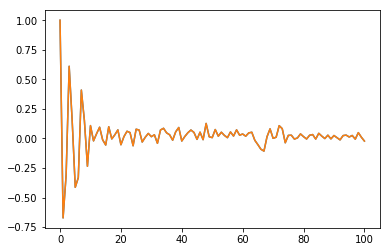

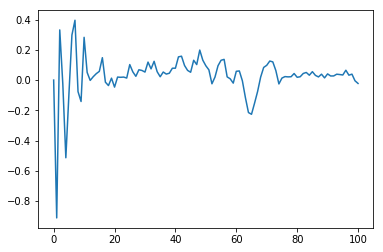

In [0]:
##LEVINSON DURBIN
k = np.zeros((len(Ms)+1,))
P_0 = r[0]
delta_0 = np.conj(r[1])
a_0 = np.zeros((len(Ms)+1,))
a_0[0] = 1
for m in Ms:
    k[m] = -delta_0/P_0
    a2 = np.zeros((m+1,))
    a2[0] = 1
    a2[1:] = [(a_0[kdx] + k[m] * a_0[m-kdx]) for kdx in range(1,m+1)]
    a_0[0:m+1] = a2
    delta_0 = r[m+1] + sum([a2[kdx]*r[m+1-kdx] for kdx in range(1,m+1)])
    P_0 = P_0 * (1 - k[m]**2)
    
fmLD = signal.filtfilt(a_0,[1],u)
plt.figure()
plt.plot(a)
plt.plot(a_0)
plt.show()

plt.figure()
plt.plot(k)
plt.show()
Audio(data=u-fmLD,rate=fs)
    

Se puede notar como los coeficientes del filtro del error de predicción obtenidos con Levinson-Durbin resultan idénticos a los obtenidos calculando la inversión matricial. Además, se observa que los coeficientes $k_{m}$ van tendiendo a cero en cada paso de la recusión.